### Import Data

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as le
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn import tree

### Import dan Cek Dataset

In [147]:
df_fish = pd.read_csv('fish_data.csv')
df_fish.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [148]:
print("Data Shape : ",df_fish.shape)

Data Shape :  (4080, 4)


In [149]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [150]:
df_fish.describe()


,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [151]:
df_fish.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [152]:
df_fish['species'].value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [153]:
encoder = le()
df_fish['species'] = encoder.fit_transform(df_fish['species'])
df_fish['species'].value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

### Train Test Split

In [154]:
x = df_fish.drop('species',axis=1)
y = df_fish['species']

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

### Modeling,Evaluasi,dan Prediksi


In [157]:
klasifikasi = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=15,random_state=0)
klasifikasi.fit(x_train,y_train)
single_tree = klasifikasi.estimators_[5]


In [158]:
y_pred = klasifikasi.predict(x_test)
CLF = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Nilai Akurasi Random Forest : {:.2f}".format(CLF*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       115
           2       0.73      0.78      0.76       123
           3       1.00      1.00      1.00       115
           4       1.00      1.00      1.00       102
           5       1.00      1.00      1.00       111
           6       1.00      1.00      1.00        92
           7       0.76      0.71      0.73       119
           8       1.00      1.00      1.00       122

    accuracy                           0.94      1020
   macro avg       0.94      0.94      0.94      1020
weighted avg       0.94      0.94      0.94      1020

Nilai Akurasi Random Forest : 93.92


### Visualisasi Pohon

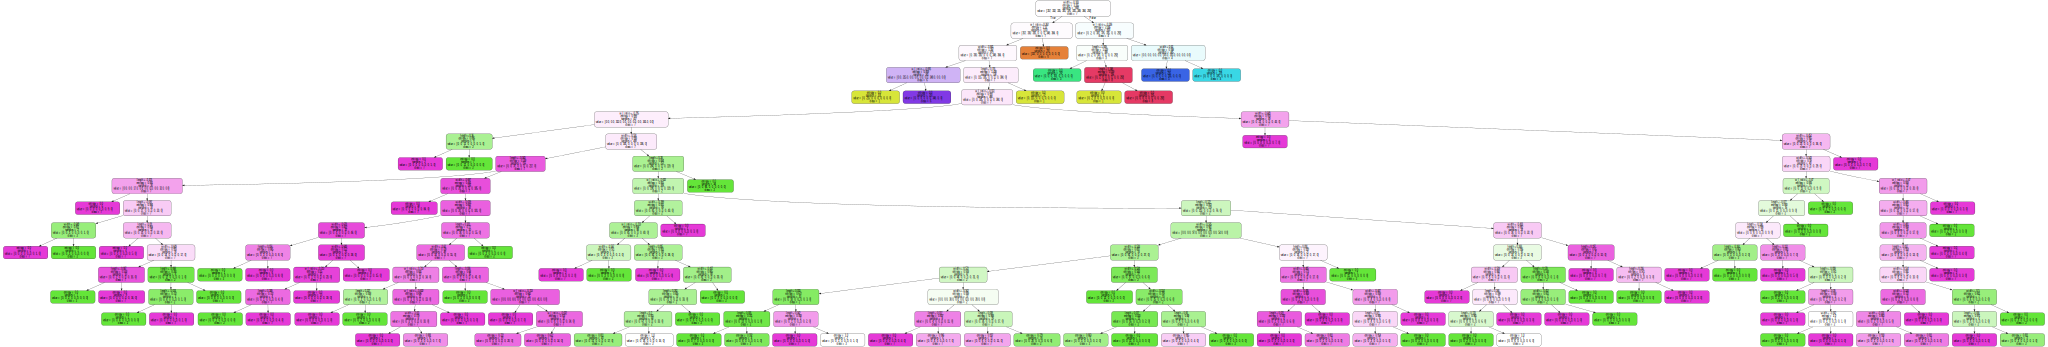

In [159]:
dot_data = tree.export_graphviz(single_tree, out_file=None, feature_names=['length', 'width', 'w_l_ratio'], class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

### Tes Data Baru dan Buat Model

In [178]:
new_fish = {
    'length': [1],
    'weight': [45],
    'w_l_ratio': [9]
}

new_fish = pd.DataFrame(new_fish)
new_fish


,length,weight,w_l_ratio
0,1,45,9


In [179]:
scaled_new_data = scaler.transform(new_fish)
y_pred_new = klasifikasi.predict(scaled_new_data)

print("Ikan yang di prediksi termasuk jenis :",encoder.inverse_transform(y_pred_new))

Ikan yang di prediksi termasuk jenis : ['Pethia conchonius']


In [180]:
import pickle
pickle.dump(klasifikasi, open('RFC_fish.pkl', 'wb'))